In [1]:
import uproot3 as uproot
import pandas as pd
import numpy as np

In [2]:
samples_dic= {'data': [['data', 'data_A'], 
                       ['data', 'data_B'], 
                       ['data', 'data_C'], 
                       ['data', 'data_D']],
              'higgs': [['mc', 'mc_345060.ggH125_ZZ4lep'], 
                        ['mc', 'mc_344235.VBFH125_ZZ4lep']], 
              'zz': [['mc', 'mc_363490.llll']], 
              'other': [['mc', 'mc_361106.Zee'], 
                        ['mc', 'mc_361107.Zmumu']]}

In [3]:
processes = samples_dic.keys()
Tuples={}
samples=[]
for p in processes:
    for d in samples_dic[p]:
        # Load the dataframes
        folder = d[0] # Folder name
        sample = d[1] # Sample name
        samples.append(sample)
        #df[sample] = ROOT.RDataFrame("mini", "{}/4lep/{}/{}.4lep.root".format(path, folder, sample))
        #DataUproot = uproot.open(f'./samples_noFilter_GEM_{sample}.root')
        DataUproot = uproot.open(f'./Cap4-Matplotlib/new_root_FilterGem_{sample}.root')
        Tuples[sample] = DataUproot['myTree']

Primero leemos todas las branches que comiencen con `lep`

In [4]:
list(Tuples['data_A'].allkeys())

[b'goodlep_E',
 b'lep_E',
 b'runNumber',
 b'lep_trackd0pvunbiased',
 b'eventNumber',
 b'goodlep_phi',
 b'm4l',
 b'lep_pt',
 b'goodlep_eta',
 b'lep_phi',
 b'trigP',
 b'channelNumber',
 b'goodlep_pt',
 b'lep_tracksigd0pvunbiased',
 b'lep_ptcone30',
 b'weight',
 b'lep_etcone20',
 b'lep_charge',
 b'lep_trigMatched',
 b'met_et',
 b'trigM',
 b'sum_good_lep',
 b'lep_type',
 b'lep_isTightID',
 b'trigE',
 b'lep_truthMatched',
 b'met_phi',
 b'XSection',
 b'lep_n',
 b'goodlep_sumtypes',
 b'lep_eta',
 b'good_lep',
 b'sum_lep_charge',
 b'lep_z0']

In [5]:
Tuples

{'data_A': <TTree b'myTree' at 0x7fd3a82ee430>,
 'data_B': <TTree b'myTree' at 0x7fd3ac033970>,
 'data_C': <TTree b'myTree' at 0x7fd3ac03f250>,
 'data_D': <TTree b'myTree' at 0x7fd36f5ab2b0>,
 'mc_345060.ggH125_ZZ4lep': <TTree b'myTree' at 0x7fd36f559fd0>,
 'mc_344235.VBFH125_ZZ4lep': <TTree b'myTree' at 0x7fd36f520dc0>,
 'mc_363490.llll': <TTree b'myTree' at 0x7fd36f4d1730>,
 'mc_361106.Zee': <TTree b'myTree' at 0x7fd36cb5b850>,
 'mc_361107.Zmumu': <TTree b'myTree' at 0x7fd369b2dd00>}

In [6]:
branches={}
for s in samples:
    branches[s] = Tuples[s].arrays(namedecode='utf-8')

In [7]:
import matplotlib.pyplot as plt

(array([ 3., 13.,  3.,  5.,  4.,  2.,  0.,  0.,  1.,  1.]),
 array([ 19.312525,  82.30848 , 145.30444 , 208.3004  , 271.29636 ,
        334.2923  , 397.28827 , 460.2842  , 523.28015 , 586.2761  ,
        649.2721  ], dtype=float32),
 <a list of 10 Patch objects>)

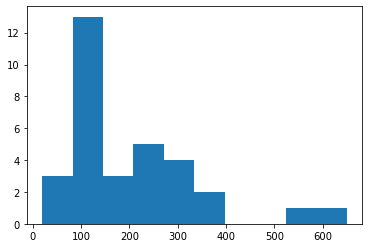

In [8]:
plt.hist(branches['data_A']['m4l'])

# Selection

- sum good leptons
- sum charge
- sum types

### Example of a simple selection

In [9]:
sum_leptons_test = branches['data_A']['sum_good_lep'] == 4

In [10]:
 branches['data_A']['good_lep']

<JaggedArray [[1 1 1 1] [1 1 1 1] [1 1 1 0] ... [1 1 0 0] [1 1 1 1] [1 0 1 1]] at 0x7fd3611b33a0>

In [11]:
sum_leptons_test

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False])

## All the selection for this analysis

In [12]:
selection_events={}
for s in samples:
    # trigger
    trigger = ((branches[s]['trigM'] == True) | (branches[s]['trigE'] == True))
    sum_leptons = branches[s]['sum_good_lep'] == 4
    sum_charge = branches[s]['sum_lep_charge'] == 0
    sum_types_ee = branches[s]['goodlep_sumtypes'] == 44
    sum_types_mm = branches[s]['goodlep_sumtypes'] == 52
    sum_types_em = branches[s]['goodlep_sumtypes'] == 48
    sum_types_goodlep = (sum_types_ee | sum_types_mm | sum_types_em)
    sum_lep_selection = (sum_leptons & sum_charge & sum_types_goodlep)
    # Select leptons with high transverse momentum
    pt_0_selection = ((branches[s]['lep_pt'][:,0] > 25000) & (branches[s]['good_lep'][:,0] == 1))
    pt_1_selection = ((branches[s]['lep_pt'][:,1] > 15000) & (branches[s]['good_lep'][:,1] == 1))
    pt_2_selection = ((branches[s]['lep_pt'][:,2] > 10000) & (branches[s]['good_lep'][:,2] == 1))
    high_pt_selection = (pt_0_selection & pt_1_selection & pt_2_selection)
    final_selection = trigger & sum_types_goodlep & sum_lep_selection & high_pt_selection
    selection_events[s] = final_selection

In [13]:
for s in samples:
    print(s,'      Initial events: ', len(branches[s]['m4l']))

data_A       Initial events:  32
data_B       Initial events:  108
data_C       Initial events:  174
data_D       Initial events:  277
mc_345060.ggH125_ZZ4lep       Initial events:  163316
mc_344235.VBFH125_ZZ4lep       Initial events:  189542
mc_363490.llll       Initial events:  547603
mc_361106.Zee       Initial events:  244
mc_361107.Zmumu       Initial events:  148


In [14]:
for s in samples:
    print(s,'      After selection: ', len(branches[s]['m4l'][selection_events[s]]))

data_A       After selection:  18
data_B       After selection:  52
data_C       After selection:  93
data_D       After selection:  158
mc_345060.ggH125_ZZ4lep       After selection:  141559
mc_344235.VBFH125_ZZ4lep       After selection:  161087
mc_363490.llll       After selection:  454699
mc_361106.Zee       After selection:  27
mc_361107.Zmumu       After selection:  16


In [15]:
mc_samples=samples[4:]

In [16]:
data_samples=samples[:4]

In [17]:
stack_mc_list=[]
for s in mc_samples:
    mc_selection_values=branches[s]['m4l'][selection_events[s]]
    stack_mc_list.append(mc_selection_values)
    print(len(mc_selection_values))

141559
161087
454699
27
16


In [18]:
stack_weights_list=[]
for s in mc_samples:
    mc_selection_weight=branches[s]['weight'][selection_events[s]]
    stack_weights_list.append(mc_selection_weight)
    print(len(mc_selection_weight))

141559
161087
454699
27
16


In [19]:
stack_data_list=[]
for d in data_samples:
    data_list=list(branches[d]['m4l'][selection_events[d]])
    stack_data_list+=data_list
    print(d,len(data_list))

data_A 18
data_B 52
data_C 93
data_D 158


In [20]:
def plotData(data_var, range_ab, bins_samples):
    data_hist,bins = np.histogram(data_var, range=range_ab, bins=bins_samples) 
    #data_hist, bins = plt.hist(data_var, range=range_ab, stacked=True, bins=bins_samples)
    print(data_hist, bins)
    data_hist_errors = np.sqrt( data_hist )
    bin_center=(bins[1:]+bins[:-1])/2
    h0=plt.errorbar(x=bin_center, y=data_hist, yerr=data_hist_errors,fmt='ko', label='Data')

In [21]:
var_name = 'm4l'
units = ' [GeV]'
rangos = [[80,170]]
bines = 24 #int((rangos[0][-1]-rangos[0][0])/5)

[ 1  6 20  7  4  3  1  0  2  1  7  9  7  3  3  1  4  1  2  4  2  1  4  2] [ 80.    83.75  87.5   91.25  95.    98.75 102.5  106.25 110.   113.75
 117.5  121.25 125.   128.75 132.5  136.25 140.   143.75 147.5  151.25
 155.   158.75 162.5  166.25 170.  ]


/home/marcela/anaconda3/envs/worknew/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


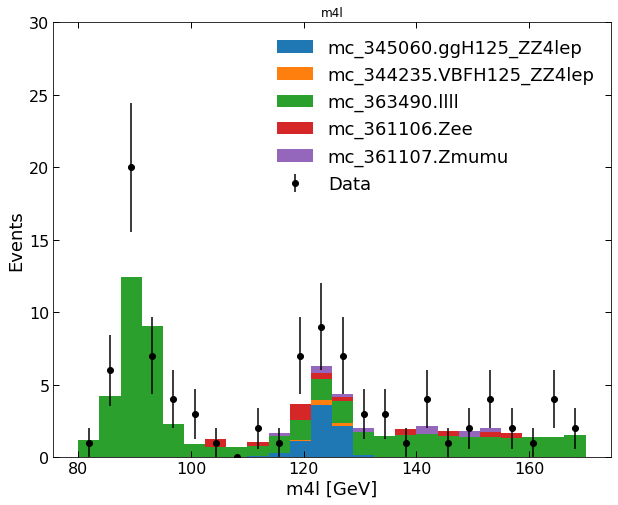

In [22]:
plt.figure(figsize=(10,8))
plt.title(var_name)
plotData(stack_data_list, rangos[0], bines)
h1=plt.hist(stack_mc_list, range=rangos[0], label=mc_samples, stacked=True, weights=stack_weights_list, bins=bines)
plt.ylabel('Events', fontsize=18)
plt.xlabel(var_name+units, fontsize=18)
#plt.yscale('log')
plt.tick_params(which='both', # ticks on both x and y axes
                direction='in', # Put ticks inside and outside the axes
                top=True, # draw ticks on the top axis
                right=True, length=6, width=1)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylim(0,30)
plt.legend(fontsize=18,frameon=False)
plt.show()
plt.close()